In [53]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random
import os

# Preparing Data

In [190]:
dir='/content/drive/MyDrive/chest_xray'
listdata = os.listdir(dir)
for data in listdata:
  if data=='train':
    labelnames = os.listdir(os.path.join(dir,data))
    #print(labelnames)
    filenames = list()
    categories = list()
    for label in labelnames:
      if label == 'PNEUMONIA':
        a= [os.path.join(os.path.join(data,label),image) for image in os.listdir(os.path.join(os.path.join(dir,data),label)) if image not in '.DS_Store']
        filenames.extend(a)
        categories.extend([0]*len(a))
      elif label == 'NORMAL':
        a= [os.path.join(os.path.join(data,label),image) for image in os.listdir(os.path.join(os.path.join(dir,data),label)) if image not in '.DS_Store']
        filenames.extend(a)
        categories.extend([1]*len(a))
    train_df = pd.DataFrame({
        'filename': filenames,
        'category': categories
    })
  elif data=='test':
    labelnames = os.listdir(os.path.join(dir,data))
    #print(labelnames)
    filenames = list()
    categories = list()
    for label in labelnames:
      if label == 'PNEUMONIA':
        #print(os.path.join(os.path.join(data,label),image))
        a= [os.path.join(os.path.join(data,label),image) for image in os.listdir(os.path.join(os.path.join(dir,data),label)) if image not in '.DS_Store']
        filenames.extend(a)
        categories.extend([0]*len(a))
      elif label == 'NORMAL':
        a= [os.path.join(os.path.join(data,label),image) for image in os.listdir(os.path.join(os.path.join(dir,data),label)) if image not in '.DS_Store']
        filenames.extend(a)
        categories.extend([1]*len(a))
    test_df = pd.DataFrame({
        'filename': filenames,
        'category': categories
    })
  elif data== 'val':
    labelnames = os.listdir(os.path.join(dir,data))
    #print(labelnames)
    filenames = list()
    categories = list()
    for label in labelnames:
      if label == 'PNEUMONIA':
        a= [os.path.join(os.path.join(data,label),image) for image in os.listdir(os.path.join(os.path.join(dir,data),label)) if image not in '.DS_Store']
        filenames.extend(a)
        categories.extend([0]*len(a))
      elif label == 'NORMAL':
        a= [os.path.join(os.path.join(data,label),image) for image in os.listdir(os.path.join(os.path.join(dir,data),label)) if image not in '.DS_Store']
        filenames.extend(a)
        categories.extend([1]*len(a))
    val_df = pd.DataFrame({
        'filename': filenames,
        'category': categories
    })


In [183]:
test_df.head(2)

,filename,category
0,test/NORMAL/IM-0027-0001.jpeg,1
1,test/NORMAL/IM-0031-0001.jpeg,1


In [117]:
print(train_df.shape,test_df.shape,val_df.shape)

(5215, 2) (624, 2) (16, 2)


In [76]:
os.listdir("/content/drive/MyDrive/chest_xray/val")
os.path.join('/content/drive/MyDrive/chest_xray/val','NORMAL')
labelnames = os.listdir("/content/drive/MyDrive/chest_xray/val")
filenames = list()
categories = list()
for label in labelnames:
  if label == 'PNEUMONIA':
    a= [image for image in os.listdir(os.path.join('/content/drive/MyDrive/chest_xray/val',label)) if image not in '.DS_Store']
    filenames.extend(a)
    categories.extend([0]*len(a))
  elif label == 'NORMAL':
    a= [image for image in os.listdir(os.path.join('/content/drive/MyDrive/chest_xray/val',label)) if image not in '.DS_Store']
    filenames.extend(a)
    categories.extend([1]*len(a))
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df.head(15)

,filename,category
0,NORMAL2-IM-1436-0001.jpeg,1
1,NORMAL2-IM-1431-0001.jpeg,1
2,NORMAL2-IM-1442-0001.jpeg,1
3,NORMAL2-IM-1430-0001.jpeg,1
4,NORMAL2-IM-1437-0001.jpeg,1
5,NORMAL2-IM-1438-0001.jpeg,1
6,NORMAL2-IM-1427-0001.jpeg,1
7,NORMAL2-IM-1440-0001.jpeg,1
8,person1951_bacteria_4882.jpeg,0
9,person1946_bacteria_4875.jpeg,0


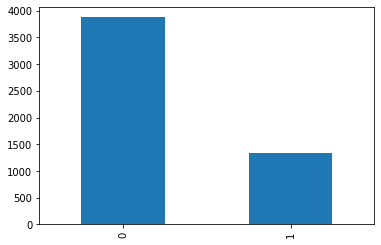

In [118]:
train_df['category'].value_counts().plot.bar()

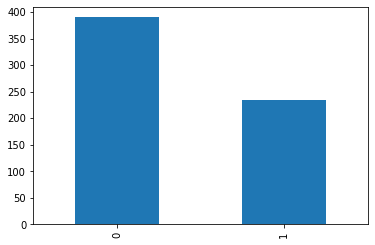

In [119]:
test_df['category'].value_counts().plot.bar()

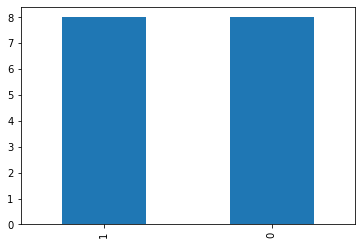

In [120]:
val_df['category'].value_counts().plot.bar()

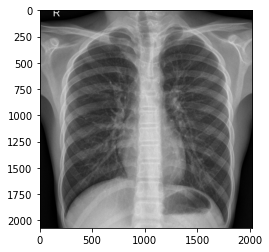

In [137]:
sample = random.choice(test_df.filename)
try:
  image = load_img("/content/drive/MyDrive/chest_xray/test/NORMAL/"+sample)
  plt.imshow(image)
except:
  print('PNEUMONIA')
  image = load_img("/content/drive/MyDrive/chest_xray/test/PNEUMONIA/"+sample)
  plt.imshow(image)

In [213]:
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.models import Model

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [214]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
#train_df=train_df.category.astype('category')
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/drive/MyDrive/chest_xray/", 
    x_col='filename',
    y_col='category',
    class_mode='raw',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 5215 validated image filenames.


In [215]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    val_df, 
    "/content/drive/MyDrive/chest_xray/", 
    x_col='filename',
    y_col='category',
    class_mode='raw',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 16 validated image filenames.


In [216]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = validation_datagen.flow_from_dataframe(
    test_df, 
    "/content/drive/MyDrive/chest_xray/", 
    x_col='filename',
    y_col='category',
    class_mode='raw',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 624 validated image filenames.


Found 1 validated image filenames.


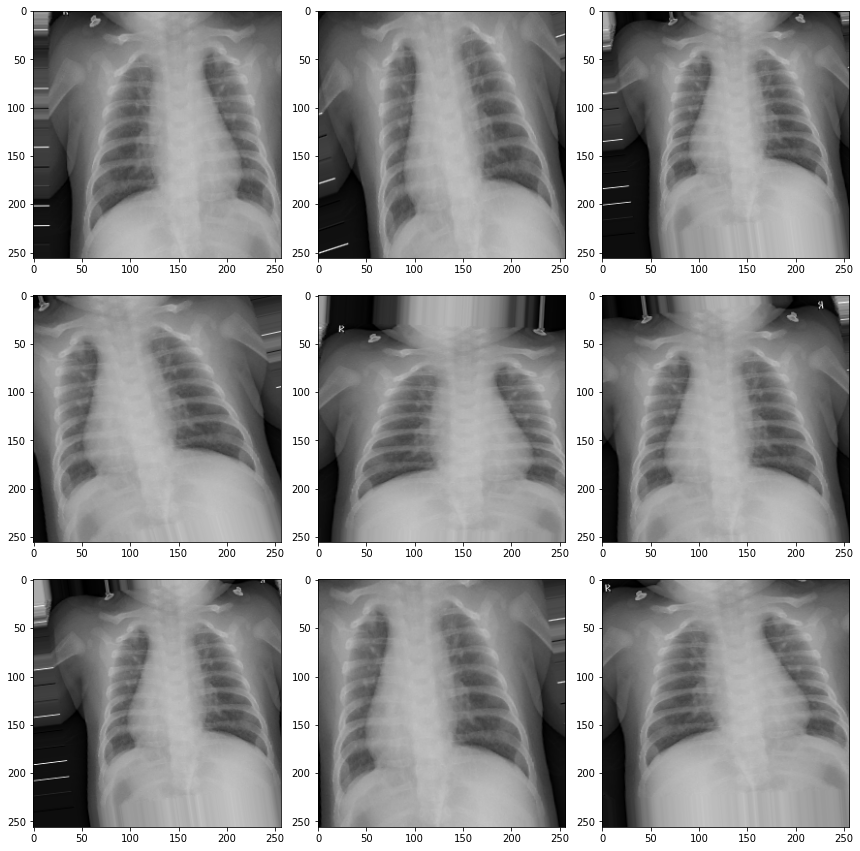

In [207]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/content/drive/MyDrive/chest_xray/", 
    x_col='filename',
    y_col='category',
    class_mode='raw'
)
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [217]:
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=val_df.shape[0]//batch_size,
    steps_per_epoch=train_df.shape[0]//batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
100/100 [==============================] - 361s 4s/step - loss: 0.6959 - accuracy: 0.6246 - val_loss: 0.8532 - val_accuracy: 0.5000
Epoch 2/2
100/100 [==============================] - 311s 3s/step - loss: 0.4380 - accuracy: 0.7923 - val_loss: 0.5411 - val_accuracy: 0.6250


In [218]:
loss, accuracy = model.evaluate_generator(test_generator, test_df.shape[0]//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test: accuracy = 0.788462  ;  loss = 0.450242 


In [221]:
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1),len(model_history.history[acc])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


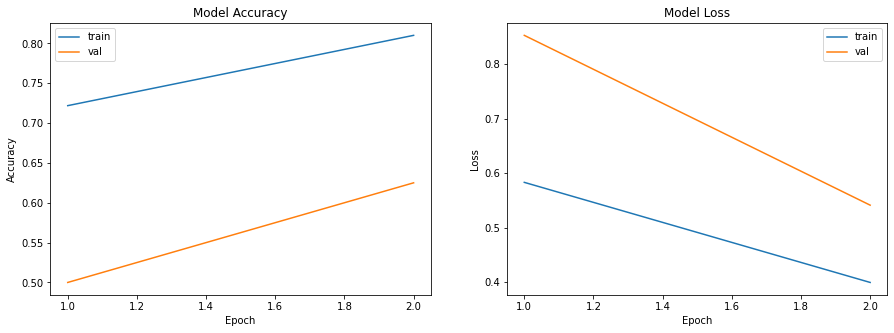

In [222]:
plot_model_history(history)

In [224]:
Y_val = val_df['category']
y_pred =  model.predict_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [225]:
threshold = 0.5
y_final = np.where(y_pred > threshold, 1,0)

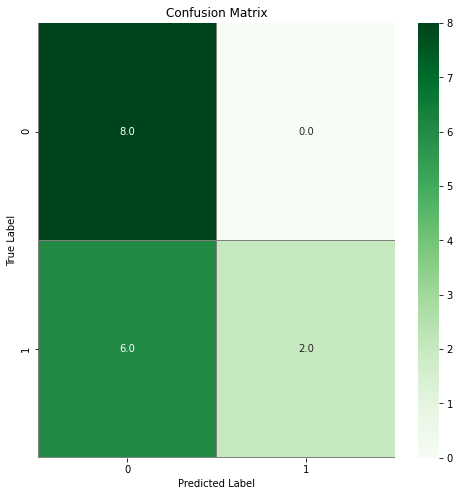

In [226]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_val, y_final) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [227]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(Y_val, y_final, target_names=['0','1'])

print(report)

              precision    recall  f1-score   support

           0       0.57      1.00      0.73         8
           1       1.00      0.25      0.40         8

    accuracy                           0.62        16
   macro avg       0.79      0.62      0.56        16
weighted avg       0.79      0.62      0.56        16

